<a href="https://colab.research.google.com/github/kimys0279/NCSU/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#! pip install google-colab 
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [52]:
df = pd.read_csv('/content/gdrive/MyDrive/Work/Raleigh_Police_Incidents_(NIBRS).csv')

In [53]:
df.head()

,X,Y,OBJECTID,GlobalID,case_number,crime_category,crime_code,crime_description,crime_type,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date
0,NaN,NaN,12001,9cdee08d-11c8-4789-864b-6965a1b2e620,NaN,MISCELLANEOUS,81H,Miscellaneous/Missing Person (18 & over),NaN,NaN,NaN,RALEIGH,Northeast,2017/01/15 03:28:00+00,2017,1,14,22,Saturday,0.0,0.0,RPD,2017/01/19 20:11:28.950+00
1,NaN,NaN,12002,6f6731f4-dd64-44c7-895c-555de2703c8a,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,RALEIGH,North,2017/07/29 12:35:00+00,2017,7,29,8,Saturday,0.0,0.0,RPD,2017/08/01 14:06:50.553+00
2,NaN,NaN,12003,f0fd0e92-448e-4ca8-86c9-e6594564318b,NaN,MISCELLANEOUS,81F,Miscellaneous/Mental Commitment,NaN,NaN,NaN,RALEIGH,Southwest,2016/03/07 03:52:00+00,2016,3,6,22,Sunday,0.0,0.0,RPD,2016/04/14 14:43:38.923+00
3,NaN,NaN,12004,8a212e84-7b53-478a-b225-c212aa25d7fd,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,RALEIGH,Southeast,2015/03/24 04:59:00+00,2015,3,24,0,Tuesday,0.0,0.0,RPD,2015/03/25 19:24:28.430+00
4,NaN,NaN,12005,01614b98-48f5-4374-a561-17c4b29d8857,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,RALEIGH,Southeast,2015/12/23 00:57:00+00,2015,12,22,19,Tuesday,0.0,0.0,RPD,2016/01/13 19:29:51.767+00


In [54]:
df.describe()

,X,Y,OBJECTID,reported_year,reported_month,reported_day,reported_hour,latitude,longitude
count,251536.000000,251536.000000,337780.000000,337780.000000,337780.000000,337780.000000,337780.000000,337780.000000,337780.000000
mean,-78.630544,35.813380,340277.453766,2017.242255,6.623820,15.623332,12.997469,26.669294,-58.554125
std,0.056653,0.050521,207202.651243,1.980785,3.447775,8.793044,6.462595,15.616303,34.286484
min,-78.984801,35.566713,12001.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,-78.984801
25%,-78.658942,35.775422,132389.750000,2016.000000,4.000000,8.000000,9.000000,0.000000,-78.645648
50%,-78.624775,35.798713,427161.500000,2017.000000,7.000000,16.000000,14.000000,35.780822,-78.600661
75%,-78.587359,35.853197,533724.250000,2019.000000,10.000000,23.000000,18.000000,35.837897,0.000000
max,-78.325027,36.004889,619094.000000,2021.000000,12.000000,31.000000,23.000000,36.004889,0.000000


In [55]:
df.max()

X                                                 -78.325
Y                                                 36.0049
OBJECTID                                           619094
GlobalID             ffff740c-768a-4ca3-b029-2d55cb8bb13c
crime_category                          WEAPONS VIOLATION
crime_code                                            82L
crime_description                     Weapons/Shots Fired
district                                              UNK
reported_date                      2021/03/19 07:23:00+00
reported_year                                        2021
reported_month                                         12
reported_day                                           31
reported_hour                                          23
reported_dayofwk                                Wednesday
latitude                                          36.0049
longitude                                               0
agency                                                RPD
updated_date  

In [56]:
df.shape

(337780, 23)

In [58]:
df = df.drop(['X', 'Y', 'GlobalID', 'OBJECTID', 'case_number', 'agency', 'updated_date', 'crime_type', 'city_of_incident', 'city'], axis = 1) 

In [59]:
df.head()

,crime_category,crime_code,crime_description,reported_block_address,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude
0,MISCELLANEOUS,81H,Miscellaneous/Missing Person (18 & over),NaN,Northeast,2017/01/15 03:28:00+00,2017,1,14,22,Saturday,0.0,0.0
1,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,North,2017/07/29 12:35:00+00,2017,7,29,8,Saturday,0.0,0.0
2,MISCELLANEOUS,81F,Miscellaneous/Mental Commitment,NaN,Southwest,2016/03/07 03:52:00+00,2016,3,6,22,Sunday,0.0,0.0
3,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,Southeast,2015/03/24 04:59:00+00,2015,3,24,0,Tuesday,0.0,0.0
4,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,Southeast,2015/12/23 00:57:00+00,2015,12,22,19,Tuesday,0.0,0.0


In [60]:
df.shape

(337780, 13)

In [61]:
for col in df.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
  print(msg)

column: crime_category	 Percent of NaN value: 0.00%
column: crime_code	 Percent of NaN value: 0.00%
column: crime_description	 Percent of NaN value: 0.00%
column: reported_block_address	 Percent of NaN value: 24.89%
column:   district	 Percent of NaN value: 0.00%
column: reported_date	 Percent of NaN value: 0.00%
column: reported_year	 Percent of NaN value: 0.00%
column: reported_month	 Percent of NaN value: 0.00%
column: reported_day	 Percent of NaN value: 0.00%
column: reported_hour	 Percent of NaN value: 0.00%
column: reported_dayofwk	 Percent of NaN value: 0.00%
column:   latitude	 Percent of NaN value: 0.00%
column:  longitude	 Percent of NaN value: 0.00%


In [62]:
df.columns

Index(['crime_category', 'crime_code', 'crime_description',
       'reported_block_address', 'district', 'reported_date', 'reported_year',
       'reported_month', 'reported_day', 'reported_hour', 'reported_dayofwk',
       'latitude', 'longitude'],
      dtype='object')

In [63]:
df[col].shape

(337780,)

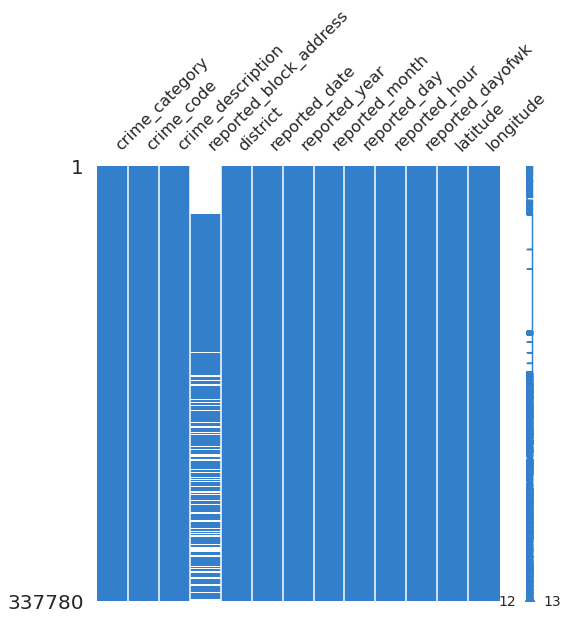

In [64]:
msno.matrix(df=df.iloc[:, :], figsize = (8, 8), color = (0.2, 0.5, 0.8))

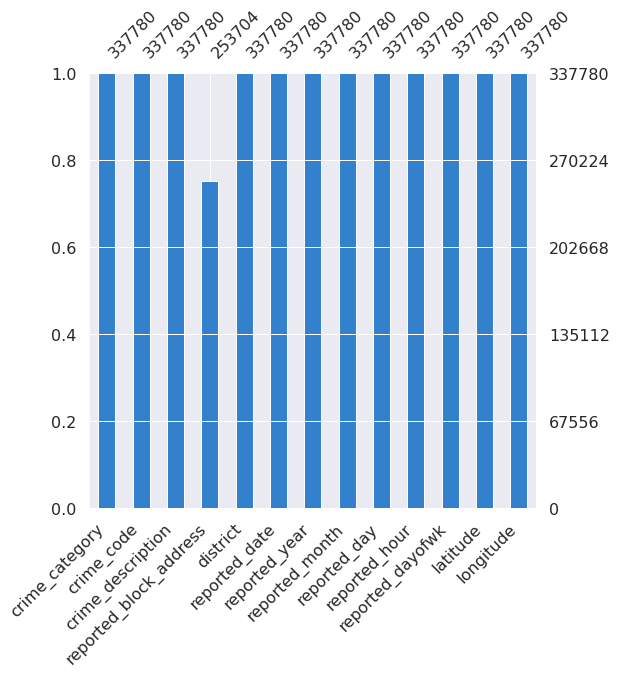

In [65]:
msno.bar(df=df.iloc[:, :], figsize = (8, 8), color = (0.2, 0.5, 0.8))

In [66]:
df.iloc[3:5, 2:]

,crime_description,reported_block_address,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude
3,Miscellaneous/All Other Non-Offenses,NaN,Southeast,2015/03/24 04:59:00+00,2015,3,24,0,Tuesday,0.0,0.0
4,Miscellaneous/All Other Non-Offenses,NaN,Southeast,2015/12/23 00:57:00+00,2015,12,22,19,Tuesday,0.0,0.0


In [69]:
pd.crosstab(df['crime_category'], df['district'], margins = True).style.background_gradient(cmap = 'Wistia')

district,Downtown,North,Northeast,Northwest,Southeast,Southwest,UNK,All
crime_category,,,,,,,,
ALL OTHER OFFENSES,2700,3483,2241,1623,3568,2260,17,15892
ARSON,36,56,51,45,120,28,0,336
ASSAULT,5680,7500,6982,3670,11522,6071,16,41441
BRIBERY,2,2,1,0,1,0,0,6
BURGLARY/COMMERCIAL,462,694,423,330,612,400,0,2921
BURGLARY/RESIDENTIAL,694,2035,1618,940,2916,2051,1,10255
DISORDERLY CONDUCT,920,467,366,186,738,442,3,3122
DRUG VIOLATIONS,3616,1729,1390,848,2994,1741,40,12358
DRUGS,5565,4386,3803,1650,7068,3006,77,25555


In [70]:
pd.crosstab(df['crime_category'], df['reported_year'], margins = True).style.background_gradient(cmap = 'Wistia')

reported_year,2014,2015,2016,2017,2018,2019,2020,2021,All
crime_category,,,,,,,,,
ALL OTHER OFFENSES,1413,2619,2379,2338,2260,2482,1989,412,15892
ARSON,36,47,40,71,38,49,49,6,336
ASSAULT,3460,6179,5946,5838,6318,6537,5901,1262,41441
BRIBERY,1,2,0,0,1,1,1,0,6
BURGLARY/COMMERCIAL,229,427,462,500,450,277,495,81,2921
BURGLARY/RESIDENTIAL,1265,1643,1758,1832,1629,1198,761,169,10255
DISORDERLY CONDUCT,306,505,442,474,482,514,340,59,3122
DRUG VIOLATIONS,2355,1812,1533,1780,1845,1749,1033,251,12358
DRUGS,948,4406,3753,4137,4298,4216,3056,741,25555


In [71]:
df[['crime_category', 'reported_year']].groupby(['reported_year'], as_index = True).mean().sort_values(by = 'reported_year', ascending = False).plot.bar()

DataError: ignored